## Prediction using Unsupervised ML

## (Level - Beginner)

From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.


<B>AUTHOR : AAYUSHMAN BHARDWAJ</B>

# IRIS DATASET

The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# GETTING DATA

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# CHECKING FOR MISSING VALUES

In [4]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# K MEANS CLUSTERING

In [6]:
from sklearn.cluster import KMeans

In [7]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Elbow method

The elbow method is used in determining the number of clusters in a data set.
The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.


<B>In my case it came out to be 3.</B>

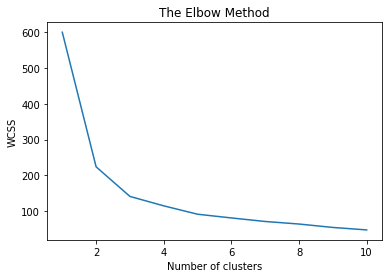

In [9]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    y_kmeans = kmeans.fit_predict(X)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    df['Cluster'] = y_kmeans
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)
kmeans.fit(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

<b> Visualising Result</b>

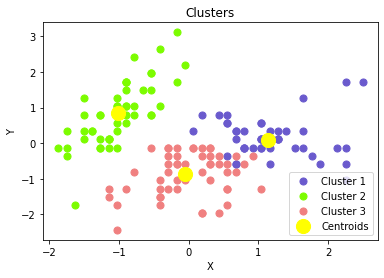

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'slateblue', label = 'Cluster 1') #careful
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'lawngreen', label = 'Cluster 2') #standard
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'lightcoral', label = 'Cluster 3') #Target

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')

plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# PERFORMANCE MEASURES

The methods to measure the cluster quality are described below:

* Inertia: Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

* Silhouette score: Silhouette score tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1.

* DB index- Lower the DB index value, better is the clustering.

 

In [12]:
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import silhouette_score


In [13]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

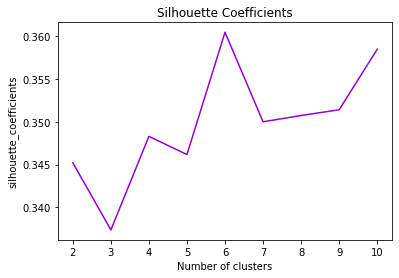

In [14]:
plt.plot(range(2, 11), silhouette_coefficients,c='darkviolet')
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

In [15]:
# for n_clusters = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("kmeans.inertia_ value : ",kmeans.inertia_)

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

labels = kmeans.labels_
print('DB index: ',davies_bouldin_score(X, labels)) 


kmeans.inertia_ value :  140.96581663074699
silhoutte value :  0.4589717867018717
DB index:  0.8354098493935597


In [16]:
# for n_clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("kmeans.inertia_ value : ",kmeans.inertia_)

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

labels = kmeans.labels_
print('DB index: ',davies_bouldin_score(X, labels)) 


kmeans.inertia_ value :  91.07341730544258
silhoutte value :  0.3448440465808624
DB index:  0.949904816910075


In [17]:
# for n_clusters = 7
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("kmeans.inertia_ value : ",kmeans.inertia_)

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

labels = kmeans.labels_
print('DB index: ',davies_bouldin_score(X, labels)) 


kmeans.inertia_ value :  72.62315179048221
silhoutte value :  0.33915321489498346
DB index:  0.9484906315811141


# THANK YOU!